<a href="https://colab.research.google.com/github/KhotNoorin/Machine-Learning-/blob/main/Bagging_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging Ensemble:


---

Bagging is a powerful ensemble learning technique designed to improve the accuracy and stability of machine learning algorithms by reducing variance and helping avoid overfitting.



---

Key Concepts
- Bootstrap: Random sampling with replacement from the dataset to create multiple subsets.
- Aggregation: The individual models are trained on these different subsets, and their outputs are combined:
  - For regression → average predictions.
  - For classification → majority voting.



---

Why Use Bagging?
- Reduces variance.
- Useful for high-variance models (like Decision Trees).
- Helps in avoiding overfitting.
- Works well with unstable learners.


---

Popular Bagging Algorithm: Random Forest:
- Random Forest is a bagging ensemble of decision trees with added randomness in feature selection.

---

Advantages:
- Better accuracy than single models.
- Reduces overfitting.
- Easy to implement.



---

Limitations
- Not effective for models with low variance (e.g., Linear Regression).
- Computational cost is higher than a single model.

---



In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('/content/Iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [46]:
df = df.iloc[:,1:]

In [47]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()

In [50]:
df['Species'] = encoder.fit_transform(df['Species'])

In [51]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [53]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

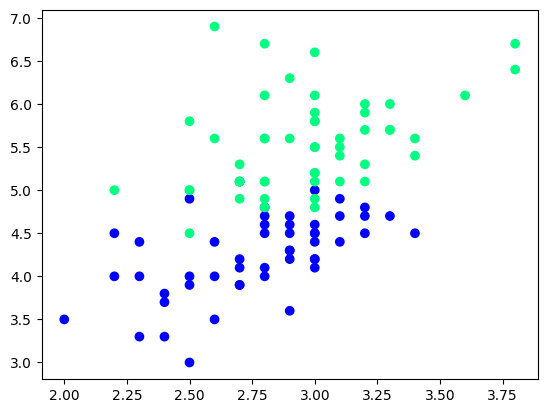

In [55]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [56]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
86,3.1,4.7,1
85,3.4,4.5,1
75,3.0,4.4,1
108,2.5,5.8,2
63,2.9,4.7,1
76,2.8,4.8,1
70,3.2,4.8,1
109,3.6,6.1,2
78,2.9,4.5,1


In [57]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [58]:
df_train

,SepalWidthCm,PetalLengthCm,Species
77,3.0,5.0,1
67,2.7,4.1,1
113,2.5,5.0,2
56,3.3,4.7,1
51,3.2,4.5,1
141,3.1,5.1,2
70,3.2,4.8,1
128,2.8,5.6,2
88,3.0,4.1,1
65,3.1,4.4,1


In [59]:
df_val

,SepalWidthCm,PetalLengthCm,Species
57,2.4,3.3,1
114,2.8,5.1,2
116,3.0,5.5,2
59,2.7,3.9,1
81,2.4,3.7,1


In [60]:
df_test

,SepalWidthCm,PetalLengthCm,Species
147,3.0,5.2,2
135,3.0,6.1,2
106,2.5,4.5,2
144,3.3,5.7,2
63,2.9,4.7,1


In [61]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [62]:
y_test

array([1, 2, 2, 1, 1])

# Case 1 - Bagging:=

In [63]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
70,3.2,4.8,1
141,3.1,5.1,2
67,2.7,4.1,1
77,3.0,5.0,1
113,2.5,5.0,2
65,3.1,4.4,1
77,3.0,5.0,1
141,3.1,5.1,2


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [65]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [66]:
dt_bag1 = DecisionTreeClassifier()

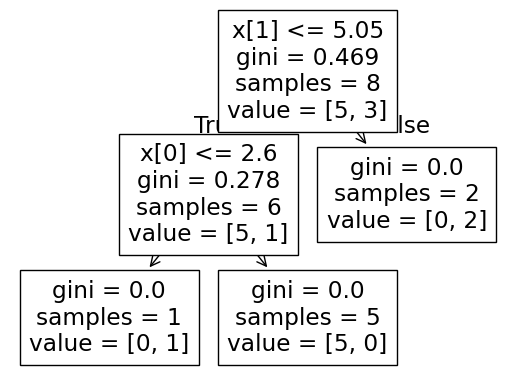

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


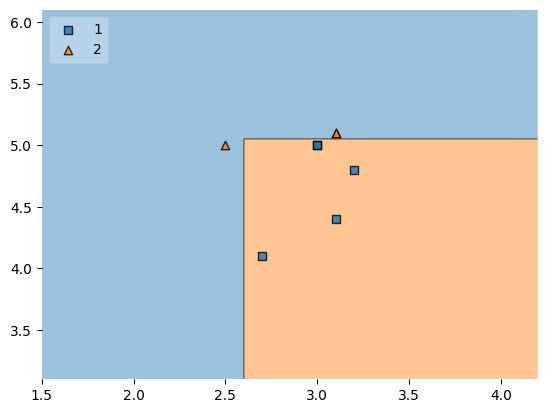

In [67]:
evaluate(dt_bag1,X,y)

In [68]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
128,2.8,5.6,2
141,3.1,5.1,2
56,3.3,4.7,1
67,2.7,4.1,1
51,3.2,4.5,1
113,2.5,5.0,2
77,3.0,5.0,1
88,3.0,4.1,1


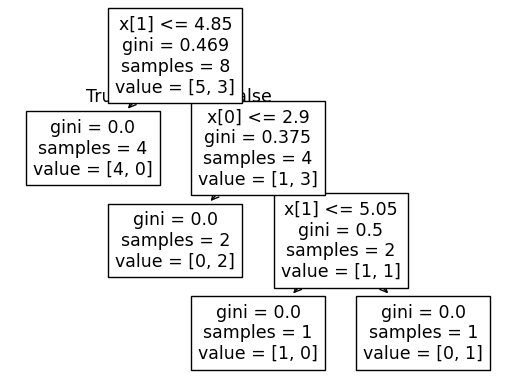

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


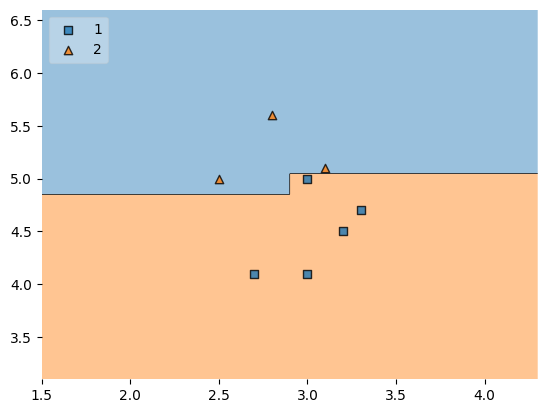

In [69]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [70]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
51,3.2,4.5,1
128,2.8,5.6,2
67,2.7,4.1,1
56,3.3,4.7,1
70,3.2,4.8,1
67,2.7,4.1,1
141,3.1,5.1,2
67,2.7,4.1,1


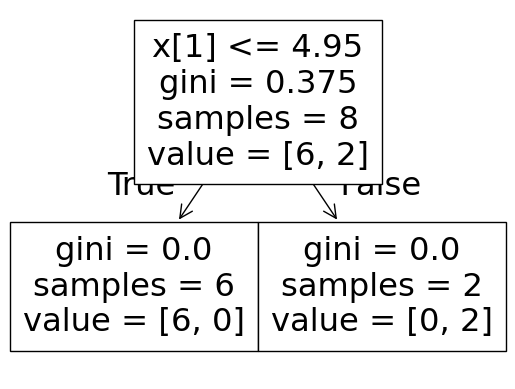

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


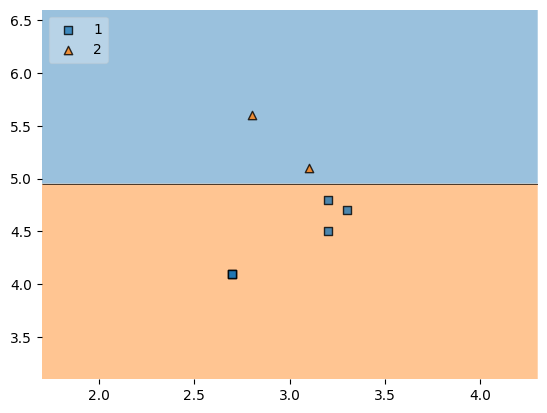

In [71]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict:

In [72]:
df_test

,SepalWidthCm,PetalLengthCm,Species
147,3.0,5.2,2
135,3.0,6.1,2
106,2.5,4.5,2
144,3.3,5.7,2
63,2.9,4.7,1


In [73]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [74]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
77,3.0,5.0,1
67,2.7,4.1,1
113,2.5,5.0,2
56,3.3,4.7,1
51,3.2,4.5,1
141,3.1,5.1,2
70,3.2,4.8,1
128,2.8,5.6,2
88,3.0,4.1,1
65,3.1,4.4,1


In [75]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
51,3.2,4.5,1
65,3.1,4.4,1
88,3.0,4.1,1
128,2.8,5.6,2
113,2.5,5.0,2
141,3.1,5.1,2
56,3.3,4.7,1
67,2.7,4.1,1


# Random Subspaces:

In [76]:
df1 = pd.read_csv('/content/Iris.csv')
df1 = df1.sample(10)

In [77]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
37,38,4.9,3.1,1.5,0.1,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
76,77,6.8,2.8,4.8,1.4,Iris-versicolor


In [78]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,SepalLengthCm
37,3.1,4.9
110,3.2,6.5
59,2.7,5.2
56,3.3,6.3
21,3.7,5.1
146,2.5,6.3
107,2.9,7.3
120,3.2,6.9
24,3.4,4.8
76,2.8,6.8


# Random Patches

In [79]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
37,38,4.9,3.1,1.5,0.1,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
76,77,6.8,2.8,4.8,1.4,Iris-versicolor


In [80]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalWidthCm,PetalLengthCm
21,0.4,1.5
21,0.4,1.5
120,2.3,5.7
120,2.3,5.7
59,1.4,3.9
120,2.3,5.7
120,2.3,5.7
76,1.4,4.8




---


# Bagging Classifiers code:

---



In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.905


In [6]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [7]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=42)

In [8]:
y_pred = bag.predict(X_test)

In [9]:
accuracy_score(y_test,y_pred)

0.9295

In [10]:
bag.estimators_samples_[0].shape

(4000,)

In [11]:
bag.estimators_features_[0].shape

(10,)

# Bagging using SVM

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

bag = BaggingClassifier(
    estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [14]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM",accuracy_score(y_test,y_pred))

Bagging using SVM 0.896


# Pasting

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

In [16]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   20.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Pasting classifier 0.9255


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished


# Random Subspaces

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)

In [18]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces classifier",accuracy_score(y_test,y_pred))

Random Subspaces classifier 0.922


In [19]:
bag.estimators_samples_[0].shape

(8000,)

In [20]:
bag.estimators_features_[0].shape

(5,)

# Random Patches

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)

In [22]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.917


# OOB Score

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

In [24]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=42)

In [25]:
bag.oob_score_

0.91725

In [26]:
y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9225


Bagging Tips:
- Bagging generally gives better results than Pasting
- Good results come around the 25% to 50% row sampling mark
- Random patches and subspaces should be used while dealing with high dimensional data
- To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV



---


# Bagging Regressor:

---



In [53]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

In [55]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [56]:
X = df.drop('medv', axis=1)  # 'medv' is the target column
y = df['medv']

In [57]:
print('Dataset features names : ', list(X.columns))
print('Dataset features size : ', X.shape)
print('Dataset target size : ', y.shape)

Dataset features names :  ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
Dataset features size :  (506, 13)
Dataset target size :  (506,)


In [58]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=123)

In [59]:
print('Train/Test Sets Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sets Sizes :  (404, 13) (102, 13) (404,) (102,)


In [61]:
# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [62]:
# Fit models
lr.fit(X_train, Y_train)
dt.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [63]:
# Predictions
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [64]:
print("R^2 score for LR:", r2_score(Y_test, y_pred1))
print("R^2 score for DT:", r2_score(Y_test, y_pred2))
print("R^2 score for KNN:", r2_score(Y_test, y_pred3))

R^2 score for LR: 0.6592466510354096
R^2 score for DT: 0.40768075291467243
R^2 score for KNN: 0.5475962186976784


In [65]:
# Bagging Regressor default
bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)
Y_preds = bag_regressor.predict(X_test)

In [66]:
print('Training Coefficient of R^2 : %.3f' % bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f' % bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.980
Test Coefficient of R^2 : 0.818


In [67]:
# Grid Search for BaggingRegressor with hyperparameters (use 'estimator')
params = {
    'estimator': [None, LinearRegression(), KNeighborsRegressor()],
    'n_estimators': [20, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

In [68]:
bagging_regressor_grid = GridSearchCV(
    BaggingRegressor(random_state=1, n_jobs=-1),
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [69]:
bagging_regressor_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=BaggingRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'estimator': [None, LinearRegression(),
                                       KNeighborsRegressor()],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [70]:
print('Train R^2 Score : %.3f' % bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f' % bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f' % bagging_regressor_grid.best_score_)
print('Best Parameters : ', bagging_regressor_grid.best_params_)

Train R^2 Score : 0.983
Test R^2 Score : 0.805
Best R^2 Score Through Grid Search : 0.871
Best Parameters :  {'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
